# РК-1
## Технологии Машинного Обучения

Успенский Даниил Андреевич, ИУ5-61Б, Вариант 19

Задача 3, датасет 3

## Задание
Для заданного набора данных произведите:
- масштабирование данных (для одного признака)
- преобразование категориальных признаков в количественные для одного признака способами:
  - label encoding
  - one hot encoding

Какие методы Вы использовали для решения задачи и почему?

Для студентов групп ИУ5-61Б, ИУ5Ц-81Б - для пары произвольных колонок данных построить график "Диаграмма рассеяния".

# Решение

### Загрузка датасета

Для работы с набором данных буду использовать библиотеку `pandas`, т.к. это самый удобный и простой вариант. 

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt

# Загрузка данных из файла
data = pd.read_csv('dataset.csv')

### Первичный анализ

In [5]:
print(' Кол-во строк: {}'.format(data.shape[0]))
print('Кол-во колонок: {}'.format(data.shape[1]))

 Кол-во строк: 150000
Кол-во колонок: 6


In [6]:
data.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

In [7]:
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


### Масштабирование данных
Для масштабирования выберу показатель `income` (заработок).

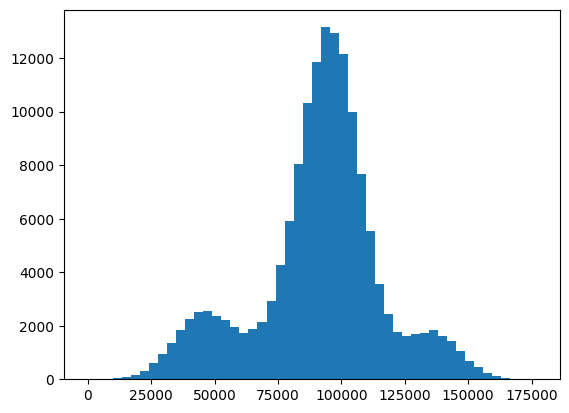

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.hist(data['Income'], 50)
plt.show()

Для масштабирования выберу метод Z-оценки. С помощью такого масштабирования удобно рассматривать, сколько стандартных отклонений составляет разброс значений выбранного показателя относительного среднего значения.

С помощью Z-оценки я смогу далее удобно создать новый категориальный признак, основанный на числовых значениях `income`

Для масштабирования буду использовать инструмент библиотеки `sklearn` - `StandardScaler`.

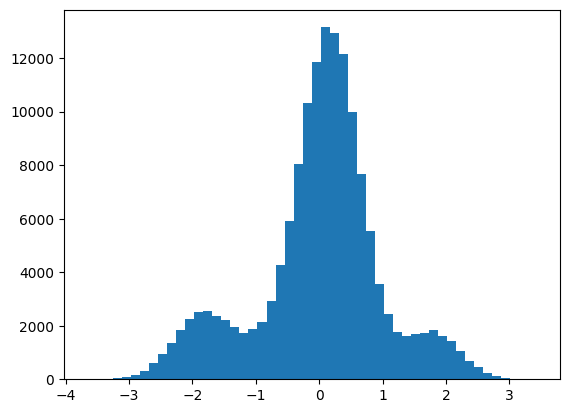

In [10]:
from sklearn.preprocessing import StandardScaler

z_sc = StandardScaler()
z_sc_data = z_sc.fit_transform(data[['Income']])

plt.hist(z_sc_data, 50)
plt.show()

### Преобразование категориального признака в количественный

In [11]:
cat_enc = data['Gender']
cat_enc

0           Male
1           Male
2           Male
3           Male
4           Male
           ...  
149995      Male
149996      Male
149997      Male
149998      Male
149999    Female
Name: Gender, Length: 150000, dtype: object

##### Lable encoding

In [12]:
cat_enc.unique()

array(['Male', 'Female'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc)

In [14]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [15]:
cat_enc_le

array([1, 1, 1, ..., 1, 1, 0])

In [16]:
import numpy as np

np.unique(cat_enc_le)

array([0, 1])

In [18]:
le.inverse_transform([0, 1])

array(['Female', 'Male'], dtype=object)

##### One-hot encoding

In [19]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(data[['Gender']])

In [20]:
cat_enc_ohe.shape

(150000, 2)

In [21]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]])

In [22]:
cat_enc.head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

### Диаграмма рассеяния 

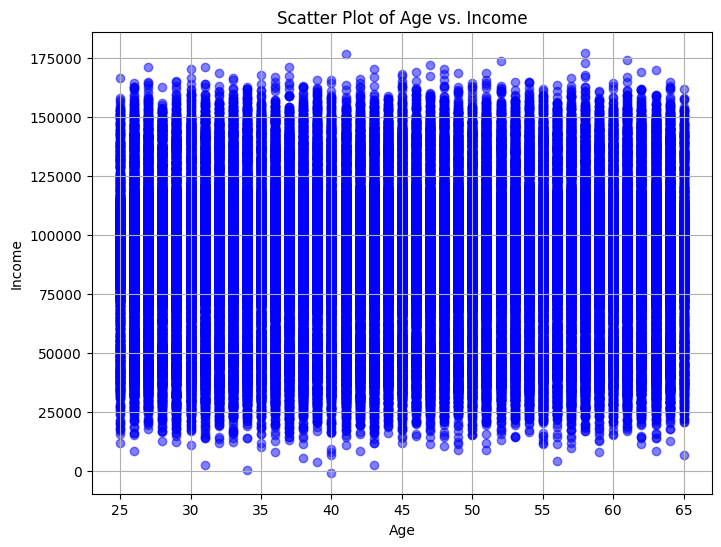

In [28]:
x_column = 'Age'
y_column = 'Income'
plt.figure(figsize=(8, 6))
plt.scatter(data[x_column], data[y_column], color='blue', alpha=0.5)
plt.title('Scatter Plot of Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.show()